# Exploring British Colonisation of India

In creating my corpus on British Colonisation of India, I used the Wikipedia API, focusing on articles within the category specifically related to British Colonisation of India. Wikipedia, being a neutral and extensive information source, provided a rich dataset. 

Initially, I imported the necessary libraries and employed the Wikipedia API to extract the first 500 articles onBritish Colonisation of Indiay.." The extracted data was then structured into a DataFrame, with one column containing the titles and the other containing the text. This step facilitated efficient data manipulation and preparation for analysis.
Following this, the data underwent pre-processing, starting with lemmatization and tokenization. Lemmatization is a process that transforms words into their meaningful base form, was employed to ensure consistency and focus on the essential semantics of the text. Tokenization, breaking down the text into individual words and phrases, was crucial for subsequent analyses.
Tokenization played a important role in understanding the distribution of specific words within the corpus. By breaking down the text into smaller units, I gained insights into word frequencies and patterns. This step provided a foundation for deeper linguistic analysis.

Later, to refine the dataset, I addressed the impact of punctuation and stopwords. Punctuation removal was essential to ensure that the analysis wasn't influenced by irrelevant characters, and the NLTK Punkt tokenizer was used to achieve this. Stopwords, common words with little semantic value, were then removed to focus on content-rich words.

The core of my analysis involved conducting a frequency analysis to examine how often each word appeared in the corpus. This process revealed key themes such as income, government, and America. The frequency distribution provided valuable insights into the most prevalent terms, shedding light on recurring topics and trends related to educational inequality. Moving forward I would create heatmaps to visually see and compare the frequency of the words between articles and also conduct a VAD analysis. 


In [1]:
# pip install gensim

In [2]:
# pip install sympy

In [3]:
# pip install wikipedia-api

In [4]:
# pip install wikipedia reader

In [5]:
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import IFrame
import random
import sympy
from collections import Counter
import random
from random import sample

import gensim
import gensim.downloader as api
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from scipy.spatial import distance
import matplotlib.pyplot as plt
import wikipedia 
import wikipediaapi

import nltk
nltk.download('brown')
nltk.download('wordnet')
nltk.download('words')
from nltk.corpus import brown
from nltk.corpus import wordnet as wn
from nltk.metrics import edit_distance
from nltk.metrics import jaccard_distance
nltk.download('omw-1.4')
from nltk.corpus import words

nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
import string
punct = list(string.punctuation)

[nltk_data] Downloading package brown to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#uses wikipedia to search the category interested in and outputs the first 20 results
wikipedia.search("British Colonisation of India", results = 20)

['British Raj',
 'British India (disambiguation)',
 'Colonisation of Africa',
 'East India Company',
 'History of the British Raj',
 'British colonization of the Americas',
 'Ujjain',
 'Javadi Hills',
 'Colonial India',
 'Throw the cat among the pigeons',
 'Partition of India',
 'PragerU Kids',
 'Austrian colonization of the Nicobar Islands',
 'Punjab Province (British India)',
 'British Empire',
 'Kingdom of Sikkim',
 'Economy of India',
 'Maharaja',
 'List of regions by past GDP (PPP)',
 'European colonisation of Southeast Asia']

In [9]:
import wikipediaapi

# this specifies the language and user agent
wiki_wiki = wikipediaapi.Wikipedia(language='en', user_agent='CorpusPriya', extract_format=wikipediaapi.ExtractFormat.WIKI)

# this searches for pages related to "British Colonisation of India"
search_results = wikipedia.search("British Colonisation of India", results=500)

# and then creates a dictionary to store titles and summaries
my_file = {}

# iterates through the search results
for title in search_results:
    # this retrieves the content of each of the pages
    page = wiki_wiki.page(title)
    
    # checks to see if the page exists
    if page.exists():
        # saves title and summary to the dictionary
        my_file[title] = {
            'title': title,
            'summary': page.text  
        }
import pandas as pd

data_list = [{'title': key, 'summary': value['summary']} for key, value in my_file.items()]

# creates a DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)
df

KeyboardInterrupt: 

In [12]:
df = pd.read_csv('nlp_a2.csv')
df

,title,summary
0,British Raj,"The British Raj ( RAHJ; from Hindi rāj, 'kingd..."
1,British India (disambiguation),"Presidencies and provinces of British India, c..."
2,Colonisation of Africa,The history of external colonisation of Africa...
3,History of the British Raj,"After the Indian Rebellion of 1857, the Britis..."
4,Ujjain,"Ujjain ( , Hindustani pronunciation: [ʊd͡ːʒɛːn..."
...,...,...
495,South Africa,"South Africa, officially the Republic of South..."
496,Great Highland bagpipe,The great Highland bagpipe (Scottish Gaelic: a...
497,Sister Nivedita,Sister Nivedita (Bengali pronunciation: [bhagi...
498,List of India-related topics in the Philippines,India and the Philippines have historic ties g...


In [8]:
# df.to_csv('nlp_a2.csv', index=False)

In [13]:
# creates a lemmatizer
lemmatizer = WordNetLemmatizer()

# tokenize and lemmatize the texts in the DataFrame
df['tokenized'] = df['summary'].apply(lambda x: word_tokenize(x))
df['lemmatized'] = df['tokenized'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# prints the modified DataFrame
print(df)
df

                                               title  \
0                                        British Raj   
1                     British India (disambiguation)   
2                             Colonisation of Africa   
3                         History of the British Raj   
4                                             Ujjain   
..                                               ...   
495                                     South Africa   
496                           Great Highland bagpipe   
497                                  Sister Nivedita   
498  List of India-related topics in the Philippines   
499                History of Indigenous Australians   

                                               summary  \
0    The British Raj ( RAHJ; from Hindi rāj, 'kingd...   
1    Presidencies and provinces of British India, c...   
2    The history of external colonisation of Africa...   
3    After the Indian Rebellion of 1857, the Britis...   
4    Ujjain ( , Hindustani pronunciat

,title,summary,tokenized,lemmatized
0,British Raj,"The British Raj ( RAHJ; from Hindi rāj, 'kingd...","[The, British, Raj, (, RAHJ, ;, from, Hindi, r...","[The, British, Raj, (, RAHJ, ;, from, Hindi, r..."
1,British India (disambiguation),"Presidencies and provinces of British India, c...","[Presidencies, and, provinces, of, British, In...","[Presidencies, and, province, of, British, Ind..."
2,Colonisation of Africa,The history of external colonisation of Africa...,"[The, history, of, external, colonisation, of,...","[The, history, of, external, colonisation, of,..."
3,History of the British Raj,"After the Indian Rebellion of 1857, the Britis...","[After, the, Indian, Rebellion, of, 1857, ,, t...","[After, the, Indian, Rebellion, of, 1857, ,, t..."
4,Ujjain,"Ujjain ( , Hindustani pronunciation: [ʊd͡ːʒɛːn...","[Ujjain, (, ,, Hindustani, pronunciation, :, [...","[Ujjain, (, ,, Hindustani, pronunciation, :, [..."
...,...,...,...,...
495,South Africa,"South Africa, officially the Republic of South...","[South, Africa, ,, officially, the, Republic, ...","[South, Africa, ,, officially, the, Republic, ..."
496,Great Highland bagpipe,The great Highland bagpipe (Scottish Gaelic: a...,"[The, great, Highland, bagpipe, (, Scottish, G...","[The, great, Highland, bagpipe, (, Scottish, G..."
497,Sister Nivedita,Sister Nivedita (Bengali pronunciation: [bhagi...,"[Sister, Nivedita, (, Bengali, pronunciation, ...","[Sister, Nivedita, (, Bengali, pronunciation, ..."
498,List of India-related topics in the Philippines,India and the Philippines have historic ties g...,"[India, and, the, Philippines, have, historic,...","[India, and, the, Philippines, have, historic,..."


In [14]:
# creates a lemmatizer and set of stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# a function to preprocess text (tokenization, lemmatization, stopword removal, punctuation removal)
def preprocess_text(text):
    # tokenize the text
    tokens = word_tokenize(text)
    
    # lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # removes any stopwords and punctuation
    cleaned_tokens = [token for token in lemmatized_tokens if token.lower() not in stop_words and token not in string.punctuation]

    return cleaned_tokens

# applies the preprocessing function to the 'summary' column
df['processed_text'] = df['summary'].apply(preprocess_text)
df

,title,summary,tokenized,lemmatized,processed_text
0,British Raj,"The British Raj ( RAHJ; from Hindi rāj, 'kingd...","[The, British, Raj, (, RAHJ, ;, from, Hindi, r...","[The, British, Raj, (, RAHJ, ;, from, Hindi, r...","[British, Raj, RAHJ, Hindi, rāj, 'kingdom, 're..."
1,British India (disambiguation),"Presidencies and provinces of British India, c...","[Presidencies, and, provinces, of, British, In...","[Presidencies, and, province, of, British, Ind...","[Presidencies, province, British, India, colle..."
2,Colonisation of Africa,The history of external colonisation of Africa...,"[The, history, of, external, colonisation, of,...","[The, history, of, external, colonisation, of,...","[history, external, colonisation, Africa, date..."
3,History of the British Raj,"After the Indian Rebellion of 1857, the Britis...","[After, the, Indian, Rebellion, of, 1857, ,, t...","[After, the, Indian, Rebellion, of, 1857, ,, t...","[Indian, Rebellion, 1857, British, Government,..."
4,Ujjain,"Ujjain ( , Hindustani pronunciation: [ʊd͡ːʒɛːn...","[Ujjain, (, ,, Hindustani, pronunciation, :, [...","[Ujjain, (, ,, Hindustani, pronunciation, :, [...","[Ujjain, Hindustani, pronunciation, ʊd͡ːʒɛːn, ..."
...,...,...,...,...,...
495,South Africa,"South Africa, officially the Republic of South...","[South, Africa, ,, officially, the, Republic, ...","[South, Africa, ,, officially, the, Republic, ...","[South, Africa, officially, Republic, South, A..."
496,Great Highland bagpipe,The great Highland bagpipe (Scottish Gaelic: a...,"[The, great, Highland, bagpipe, (, Scottish, G...","[The, great, Highland, bagpipe, (, Scottish, G...","[great, Highland, bagpipe, Scottish, Gaelic, p..."
497,Sister Nivedita,Sister Nivedita (Bengali pronunciation: [bhagi...,"[Sister, Nivedita, (, Bengali, pronunciation, ...","[Sister, Nivedita, (, Bengali, pronunciation, ...","[Sister, Nivedita, Bengali, pronunciation, bha..."
498,List of India-related topics in the Philippines,India and the Philippines have historic ties g...,"[India, and, the, Philippines, have, historic,...","[India, and, the, Philippines, have, historic,...","[India, Philippines, historic, tie, going, bac..."


In [15]:
# a new DataFrame with title and processed text
df_clean = df[['title', 'processed_text']].copy()

df_clean

,title,processed_text
0,British Raj,"[British, Raj, RAHJ, Hindi, rāj, 'kingdom, 're..."
1,British India (disambiguation),"[Presidencies, province, British, India, colle..."
2,Colonisation of Africa,"[history, external, colonisation, Africa, date..."
3,History of the British Raj,"[Indian, Rebellion, 1857, British, Government,..."
4,Ujjain,"[Ujjain, Hindustani, pronunciation, ʊd͡ːʒɛːn, ..."
...,...,...
495,South Africa,"[South, Africa, officially, Republic, South, A..."
496,Great Highland bagpipe,"[great, Highland, bagpipe, Scottish, Gaelic, p..."
497,Sister Nivedita,"[Sister, Nivedita, Bengali, pronunciation, bha..."
498,List of India-related topics in the Philippines,"[India, Philippines, historic, tie, going, bac..."


In [16]:
# combines all processed texts into a single list
all_tokens = [token for tokens_list in df_clean['processed_text'] for token in tokens_list]

# this uses counter to count the frequency of each word
word_freq = Counter(all_tokens)

# this converts the result to a DataFrame for easier manipulation and analysis
df_word_freq = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# this will sort the DataFrame by frequency in descending order
df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)

df_word_freq.head(20)


,Word,Frequency
9,wa,26151
85,'s,12737
16,India,12515
0,British,11339
307,``,10031
310,'',9736
12,Indian,7103
14,also,5883
1270,ha,4358
706,government,4241


Initially, my word frequency analysis yielded common stop words and punctuation as the most frequent terms, obscuring meaningful insights into British Colonisation of India. Recognising this I then:

Removed Stop Words: Utilized NLTK's list to filter out English stop words, ensuring my dataset focused on content-rich words.

Removed Punctuation: Implemented a process to exclude punctuation, refining my data to include only meaningful textual elements.
After refining my text preprocessing, the subsequent analysis revealed terms directly relevant to the context of British Colonisation of India, offering clearer insights and setting a solid foundation for further investigation.

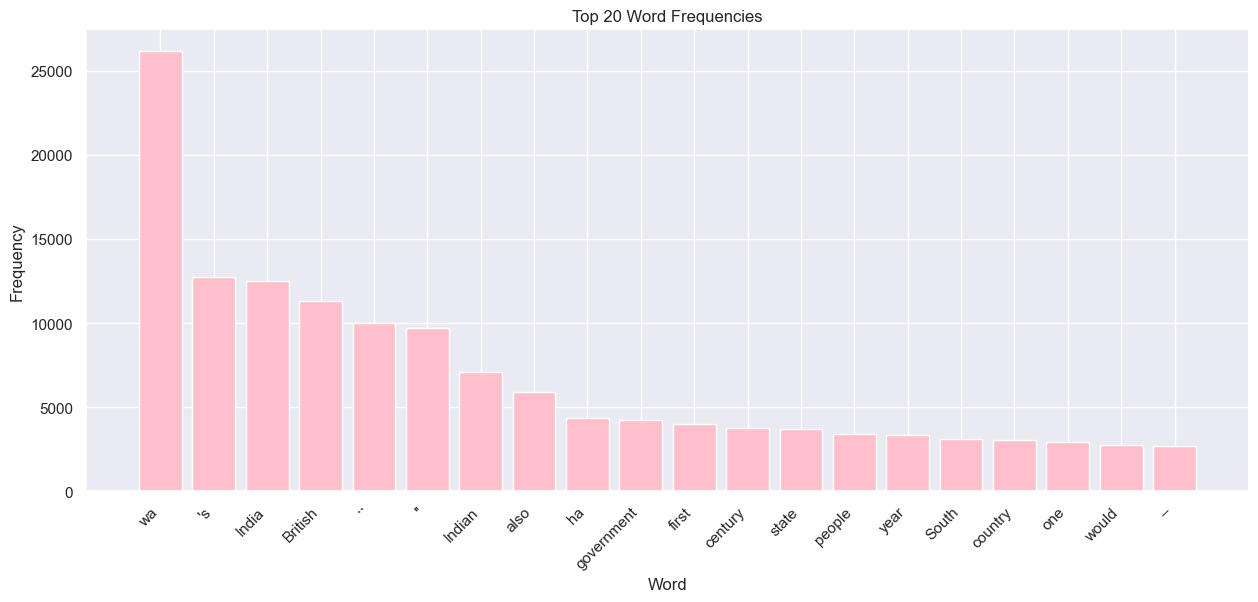

In [17]:
# plot a bar chart of the top 20 word frequencies
plt.figure(figsize=(15, 6))
plt.bar(df_word_freq['Word'][:20], df_word_freq['Frequency'][:20], color='pink')
plt.title('Top 20 Word Frequencies')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # this rotates the angle of the x-axis labels for better visibility
plt.show()


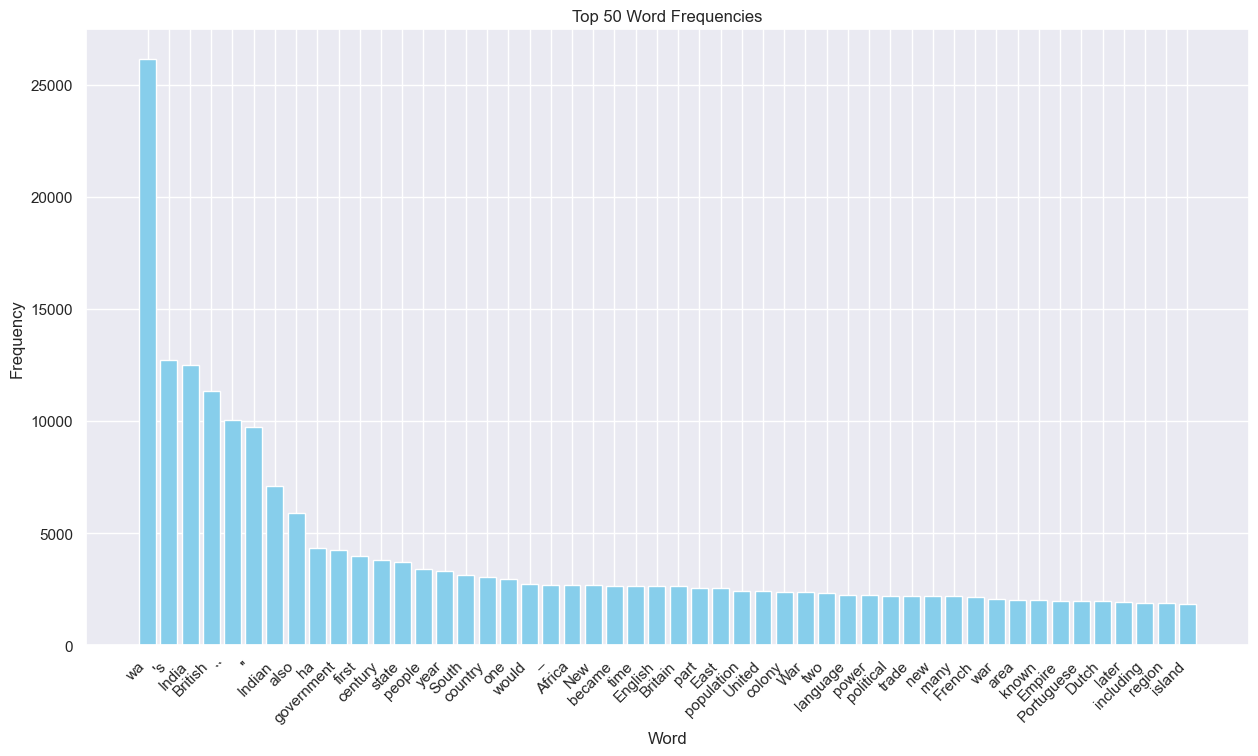

In [18]:
# plots a bar chart of the top 50 word frequencies
plt.figure(figsize=(15, 8))
plt.bar(df_word_freq['Word'][:50], df_word_freq['Frequency'][:50], color='skyblue')
plt.title('Top 50 Word Frequencies')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


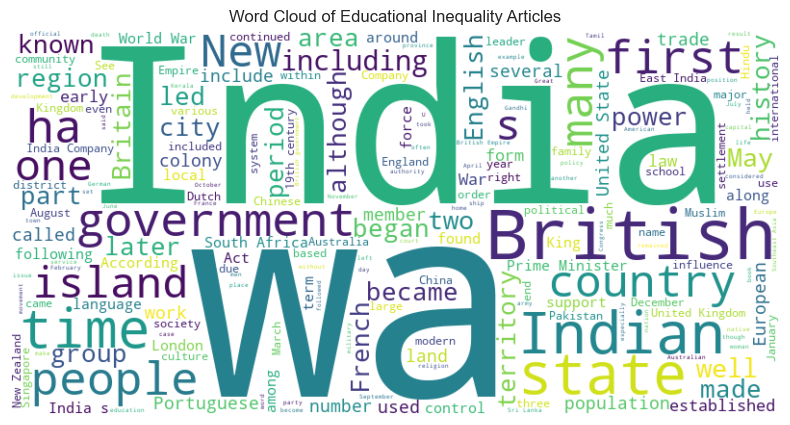

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all processed texts into a single string
all_text = ' '.join([' '.join(tokens) for tokens in df_clean['processed_text']])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Educational Inequality Articles')
plt.show()


In [21]:
df_clean

,title,processed_text
0,British Raj,"[British, Raj, RAHJ, Hindi, rāj, 'kingdom, 're..."
1,British India (disambiguation),"[Presidencies, province, British, India, colle..."
2,Colonisation of Africa,"[history, external, colonisation, Africa, date..."
3,History of the British Raj,"[Indian, Rebellion, 1857, British, Government,..."
4,Ujjain,"[Ujjain, Hindustani, pronunciation, ʊd͡ːʒɛːn, ..."
...,...,...
495,South Africa,"[South, Africa, officially, Republic, South, A..."
496,Great Highland bagpipe,"[great, Highland, bagpipe, Scottish, Gaelic, p..."
497,Sister Nivedita,"[Sister, Nivedita, Bengali, pronunciation, bha..."
498,List of India-related topics in the Philippines,"[India, Philippines, historic, tie, going, bac..."


In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download NLTK stopwords
nltk.download('stopwords')

# remove stopwords
stop_words = set(stopwords.words('english'))
df_clean['processed_text'] = df_clean['processed_text'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

# displays cleaned text
print("Text after removing stopwords:")
print(df_clean['processed_text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/priyamistry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text after removing stopwords:
0      [British, Raj, RAHJ, Hindi, rāj, 'kingdom, 're...
1      [Presidencies, province, British, India, colle...
2      [history, external, colonisation, Africa, date...
3      [Indian, Rebellion, 1857, British, Government,...
4      [Ujjain, Hindustani, pronunciation, ʊd͡ːʒɛːn, ...
                             ...                        
495    [South, Africa, officially, Republic, South, A...
496    [great, Highland, bagpipe, Scottish, Gaelic, p...
497    [Sister, Nivedita, Bengali, pronunciation, bha...
498    [India, Philippines, historic, tie, going, bac...
499    [history, Indigenous, Australians, began, leas...
Name: processed_text, Length: 500, dtype: object


In [23]:
df_clean

,title,processed_text
0,British Raj,"[British, Raj, RAHJ, Hindi, rāj, 'kingdom, 're..."
1,British India (disambiguation),"[Presidencies, province, British, India, colle..."
2,Colonisation of Africa,"[history, external, colonisation, Africa, date..."
3,History of the British Raj,"[Indian, Rebellion, 1857, British, Government,..."
4,Ujjain,"[Ujjain, Hindustani, pronunciation, ʊd͡ːʒɛːn, ..."
...,...,...
495,South Africa,"[South, Africa, officially, Republic, South, A..."
496,Great Highland bagpipe,"[great, Highland, bagpipe, Scottish, Gaelic, p..."
497,Sister Nivedita,"[Sister, Nivedita, Bengali, pronunciation, bha..."
498,List of India-related topics in the Philippines,"[India, Philippines, historic, tie, going, bac..."


In [24]:
df_clean.iloc[2]

title                                        Colonisation of Africa
processed_text    [history, external, colonisation, Africa, date...
Name: 2, dtype: object

In [25]:
df_clean.loc[0, 'processed_text']

['British',
 'Raj',
 'RAHJ',
 'Hindi',
 'rāj',
 "'kingdom",
 "'realm",
 "'state",
 "'empire",
 'wa',
 'rule',
 'British',
 'Crown',
 'Indian',
 'subcontinent',
 'also',
 'called',
 'Crown',
 'rule',
 'India',
 'Direct',
 'rule',
 'India',
 'lasted',
 '1858',
 '1947',
 'region',
 'British',
 'control',
 'wa',
 'commonly',
 'called',
 'India',
 'contemporaneous',
 'usage',
 'included',
 'area',
 'directly',
 'administered',
 'United',
 'Kingdom',
 'collectively',
 'called',
 'British',
 'India',
 'area',
 'ruled',
 'indigenous',
 'ruler',
 'British',
 'paramountcy',
 'called',
 'princely',
 'state',
 'region',
 'wa',
 'sometimes',
 'called',
 'Indian',
 'Empire',
 'though',
 'officially.As',
 'India',
 'wa',
 'founding',
 'member',
 'League',
 'Nations',
 'participating',
 'state',
 'Summer',
 'Olympics',
 '1900',
 '1920',
 '1928',
 '1932',
 '1936',
 'founding',
 'member',
 'United',
 'Nations',
 'San',
 'Francisco',
 '1945.This',
 'system',
 'governance',
 'wa',
 'instituted',
 '28',
 '

In [28]:
#df['processed_text'] = df['processed_text'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

In [29]:
stop_words = set(stopwords.words('english'))

# defines a preprocessing function
def preprocess_text(text):
    # tokenizes the text
    tokens = word_tokenize(text)
    # removes stop words
    tokens_without_stopwords = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
    return tokens_without_stopwords

# applies the preprocessing function to the text data
df['processed_text'] = df['summary'].apply(preprocess_text)

df

,title,summary,tokenized,lemmatized,processed_text
0,British Raj,"The British Raj ( RAHJ; from Hindi rāj, 'kingd...","[The, British, Raj, (, RAHJ, ;, from, Hindi, r...","[The, British, Raj, (, RAHJ, ;, from, Hindi, r...","[British, Raj, RAHJ, Hindi, rāj, rule, British..."
1,British India (disambiguation),"Presidencies and provinces of British India, c...","[Presidencies, and, provinces, of, British, In...","[Presidencies, and, province, of, British, Ind...","[Presidencies, provinces, British, India, coll..."
2,Colonisation of Africa,The history of external colonisation of Africa...,"[The, history, of, external, colonisation, of,...","[The, history, of, external, colonisation, of,...","[history, external, colonisation, Africa, date..."
3,History of the British Raj,"After the Indian Rebellion of 1857, the Britis...","[After, the, Indian, Rebellion, of, 1857, ,, t...","[After, the, Indian, Rebellion, of, 1857, ,, t...","[Indian, Rebellion, British, Government, took,..."
4,Ujjain,"Ujjain ( , Hindustani pronunciation: [ʊd͡ːʒɛːn...","[Ujjain, (, ,, Hindustani, pronunciation, :, [...","[Ujjain, (, ,, Hindustani, pronunciation, :, [...","[Ujjain, Hindustani, pronunciation, old, name,..."
...,...,...,...,...,...
495,South Africa,"South Africa, officially the Republic of South...","[South, Africa, ,, officially, the, Republic, ...","[South, Africa, ,, officially, the, Republic, ...","[South, Africa, officially, Republic, South, A..."
496,Great Highland bagpipe,The great Highland bagpipe (Scottish Gaelic: a...,"[The, great, Highland, bagpipe, (, Scottish, G...","[The, great, Highland, bagpipe, (, Scottish, G...","[great, Highland, bagpipe, Scottish, Gaelic, p..."
497,Sister Nivedita,Sister Nivedita (Bengali pronunciation: [bhagi...,"[Sister, Nivedita, (, Bengali, pronunciation, ...","[Sister, Nivedita, (, Bengali, pronunciation, ...","[Sister, Nivedita, Bengali, pronunciation, bha..."
498,List of India-related topics in the Philippines,India and the Philippines have historic ties g...,"[India, and, the, Philippines, have, historic,...","[India, and, the, Philippines, have, historic,...","[India, Philippines, historic, ties, going, ba..."


In [30]:
df.loc[4, 'processed_text']

['Ujjain',
 'Hindustani',
 'pronunciation',
 'old',
 'name',
 'Avantika',
 'Ujjayinī',
 'city',
 'Ujjain',
 'district',
 'Indian',
 'state',
 'Madhya',
 'Pradesh',
 'city',
 'Madhya',
 'Pradesh',
 'population',
 'administrative',
 'centre',
 'Ujjain',
 'district',
 'Ujjain',
 'division',
 'one',
 'Hindu',
 'pilgrimage',
 'centres',
 'Sapta',
 'Puri',
 'famous',
 'Kumbh',
 'Mela',
 'Simhastha',
 'held',
 'every',
 'years',
 'famous',
 'temple',
 'Mahakaleshwar',
 'Jyotirlinga',
 'located',
 'center',
 'city',
 'city',
 'one',
 'prominent',
 'trade',
 'political',
 'centres',
 'Indian',
 'Subcontinent',
 'time',
 'ancient',
 'Mahājanapadas',
 'British',
 'colonisation',
 'India',
 'ancient',
 'city',
 'situated',
 'eastern',
 'bank',
 'Shipra',
 'River',
 'Ujjain',
 'prominent',
 'city',
 'Malwa',
 'plateau',
 'central',
 'India',
 'much',
 'history',
 'emerged',
 'political',
 'centre',
 'central',
 'India',
 'around',
 'BCE',
 'capital',
 'ancient',
 'Avanti',
 'kingdom',
 'one',
 'six

In [31]:

# creates a translation table that maps punctuation to None
translator = str.maketrans('', '', string.punctuation)

# function to remove punctuation from each token
def remove_punctuation(tokens):
    return [word.translate(translator) for word in tokens]

# apply the function to each row in the 'processed_text' column
df['processed_text'] = df['processed_text'].apply(remove_punctuation)

# removes empty strings that may result from removing punctuation
df['processed_text'] = df['processed_text'].apply(lambda tokens: [token for token in tokens if token])
df

,title,summary,tokenized,lemmatized,processed_text
0,British Raj,"The British Raj ( RAHJ; from Hindi rāj, 'kingd...","[The, British, Raj, (, RAHJ, ;, from, Hindi, r...","[The, British, Raj, (, RAHJ, ;, from, Hindi, r...","[British, Raj, RAHJ, Hindi, rāj, rule, British..."
1,British India (disambiguation),"Presidencies and provinces of British India, c...","[Presidencies, and, provinces, of, British, In...","[Presidencies, and, province, of, British, Ind...","[Presidencies, provinces, British, India, coll..."
2,Colonisation of Africa,The history of external colonisation of Africa...,"[The, history, of, external, colonisation, of,...","[The, history, of, external, colonisation, of,...","[history, external, colonisation, Africa, date..."
3,History of the British Raj,"After the Indian Rebellion of 1857, the Britis...","[After, the, Indian, Rebellion, of, 1857, ,, t...","[After, the, Indian, Rebellion, of, 1857, ,, t...","[Indian, Rebellion, British, Government, took,..."
4,Ujjain,"Ujjain ( , Hindustani pronunciation: [ʊd͡ːʒɛːn...","[Ujjain, (, ,, Hindustani, pronunciation, :, [...","[Ujjain, (, ,, Hindustani, pronunciation, :, [...","[Ujjain, Hindustani, pronunciation, old, name,..."
...,...,...,...,...,...
495,South Africa,"South Africa, officially the Republic of South...","[South, Africa, ,, officially, the, Republic, ...","[South, Africa, ,, officially, the, Republic, ...","[South, Africa, officially, Republic, South, A..."
496,Great Highland bagpipe,The great Highland bagpipe (Scottish Gaelic: a...,"[The, great, Highland, bagpipe, (, Scottish, G...","[The, great, Highland, bagpipe, (, Scottish, G...","[great, Highland, bagpipe, Scottish, Gaelic, p..."
497,Sister Nivedita,Sister Nivedita (Bengali pronunciation: [bhagi...,"[Sister, Nivedita, (, Bengali, pronunciation, ...","[Sister, Nivedita, (, Bengali, pronunciation, ...","[Sister, Nivedita, Bengali, pronunciation, bha..."
498,List of India-related topics in the Philippines,India and the Philippines have historic ties g...,"[India, and, the, Philippines, have, historic,...","[India, and, the, Philippines, have, historic,...","[India, Philippines, historic, ties, going, ba..."


In [32]:
# combines all processed texts into a single list
all_tokens = [token for tokens_list in df['processed_text'] for token in tokens_list]

# this uses counter to count the frequency of each word
word_freq = Counter(all_tokens)

# this converts the result to a DataFrame for easier manipulation and analysis
df_word_freq = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# this will sort the DataFrame by frequency in descending order
df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)

df_word_freq.head(9)

,Word,Frequency
11,India,12515
0,British,11339
7,Indian,7103
9,also,5883
617,first,3978
652,government,3923
353,century,3226
1330,South,3143
917,people,2985


In [51]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from gensim import corpora, models
import numpy as np
import nltk

In [54]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2), stop_words='english')
X_tfidf = vectorizer.fit_transform(df['summary']).toarray()
feature_names = vectorizer.get_feature_names_out()

In [58]:
# does the sentiment analysis 
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['summary'].apply(get_sentiment)
df

,title,summary,tokenized,lemmatized,processed_text,cluster,sentiment,sentiment_label
0,British Raj,"The British Raj ( RAHJ; from Hindi rāj, 'kingd...","[The, British, Raj, (, RAHJ, ;, from, Hindi, r...","[The, British, Raj, (, RAHJ, ;, from, Hindi, r...","[the, british, raj, (, rahj, ;, from, hindi, r...",1,0.069374,1
1,British India (disambiguation),"Presidencies and provinces of British India, c...","[Presidencies, and, provinces, of, British, In...","[Presidencies, and, province, of, British, Ind...","[presidencies, and, provinces, of, british, in...",2,-0.061607,0
2,Colonisation of Africa,The history of external colonisation of Africa...,"[The, history, of, external, colonisation, of,...","[The, history, of, external, colonisation, of,...","[the, history, of, external, colonisation, of,...",4,0.034794,1
3,History of the British Raj,"After the Indian Rebellion of 1857, the Britis...","[After, the, Indian, Rebellion, of, 1857, ,, t...","[After, the, Indian, Rebellion, of, 1857, ,, t...","[after, the, indian, rebellion, of, 1857, ,, t...",1,0.073838,1
4,Ujjain,"Ujjain ( , Hindustani pronunciation: [ʊd͡ːʒɛːn...","[Ujjain, (, ,, Hindustani, pronunciation, :, [...","[Ujjain, (, ,, Hindustani, pronunciation, :, [...","[ujjain, (, ,, hindustani, pronunciation, :, [...",3,0.085894,1
...,...,...,...,...,...,...,...,...
495,South Africa,"South Africa, officially the Republic of South...","[South, Africa, ,, officially, the, Republic, ...","[South, Africa, ,, officially, the, Republic, ...","[south, africa, ,, officially, the, republic, ...",4,0.100939,1
496,Great Highland bagpipe,The great Highland bagpipe (Scottish Gaelic: a...,"[The, great, Highland, bagpipe, (, Scottish, G...","[The, great, Highland, bagpipe, (, Scottish, G...","[the, great, highland, bagpipe, (, scottish, g...",2,0.154939,1
497,Sister Nivedita,Sister Nivedita (Bengali pronunciation: [bhagi...,"[Sister, Nivedita, (, Bengali, pronunciation, ...","[Sister, Nivedita, (, Bengali, pronunciation, ...","[sister, nivedita, (, bengali, pronunciation, ...",3,0.130181,1
498,List of India-related topics in the Philippines,India and the Philippines have historic ties g...,"[India, and, the, Philippines, have, historic,...","[India, and, the, Philippines, have, historic,...","[india, and, the, philippines, have, historic,...",3,0.025541,1


In [59]:
#this is the clustering part
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)
df['cluster'] = clusters

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [60]:
#linear regression for the sentiment score prediction 
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

coefficients = lin_reg.coef_
important_features = sorted(zip(coefficients, feature_names), reverse=True)[:20]
print("Top 20 features influencing Sentiment:")
for coef, feature in important_features:
    print(f"{feature}: {coef}")

Top 20 features influencing Sentiment:
great: 0.19018129091711528
free: 0.13227406773060874
netherlands: 0.12768155998794956
large: 0.11314282114495147
best: 0.10877347727467582
emperor: 0.10697570884724653
revolution: 0.10431562390332601
2011: 0.09620298125439235
cities: 0.09375343473940657
origin: 0.09067566994575674
market: 0.09062713958862476
da: 0.08874550952132693
brought: 0.0879907566129472
popular: 0.08707548937642828
scotland: 0.08367304030149708
education: 0.08186007867492325
situation: 0.08140987584721582
founded: 0.08134564234657146
literature: 0.08086618248330397
18: 0.07953971524904424


In my analysis of the portrayal of Indian culture within British colonial literature, the "top 20 features" emerge as the most influential words or bi-grams that significantly affect the sentiment scores of the documents, based on TF-IDF feature extraction and linear regression analysis. These features are the keywords or phrases most strongly associated with either positive or negative sentiments in my dataset. 


The initial results from the linear regression analysis, based on a broad set of TF-IDF features, surfaced a wide range of terms without directly highlighting aspects of Indian culture in British colonial literature. This indicated that the dataset and feature selection might not have been focused enough to capture and analyse the nuanced representations of Indian culture. To address this, I decided to refine my approach by narrowing down the feature selection to specific, culturally significant keywords and phrases. This step aimed to concentrate the analysis on terms directly relevant to Indian culture, enhancing the model's ability to reveal how these specific aspects are sentimentally portrayed in the literature.

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

cultural_keywords = ['british india', 'colonial', 'independence', 'caste system', 'british raj', 'poverty', 'freedom', 'inequality', 'diwali', 'hindu', 'sanksrit', 'hindi', 'gujarati', 'bengali', 'kannada', 'women']

def custom_tokenizer(text):
    tokens = text.split()
    bi_grams = [' '.join(tokens[i:i+2]) for i in range(len(tokens)-1)]
    all_tokens = tokens + bi_grams
    relevant_tokens = [token for token in all_tokens if token in cultural_keywords]
    return relevant_tokens

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, stop_words='english')
X_tfidf_refined = vectorizer.fit_transform(df['summary'].apply(lambda x: x.lower())).toarray()
feature_names = vectorizer.get_feature_names_out()


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_refined, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

coefficients = lin_reg.coef_
important_features = sorted(zip(coefficients, feature_names), reverse=True)[:20]
print("Top 20 features influencing Sentiment:")
for coef, feature in important_features:
    print(f"{feature}: {coef}")


Top 20 features influencing Sentiment:
gujarati: 0.019278595920794506
kannada: 0.017710980253135902
women: 0.016206261296928714
poverty: 0.014725927574688968
hindu: 0.014656711715966487
bengali: 0.00905722886628107
inequality: 0.007211985231309675
hindi: 0.006642312112780286
caste system: -0.00016747121087934023
colonial: -0.003351388169695094
freedom: -0.0056948128724187965
independence: -0.0057986114228775285
british india: -0.011752734367254524
british raj: -0.02027121535757648
diwali: -0.026648980302408788


The linear regression analysis reveals distinct sentiment associations with specific terms related to Indian culture and British colonial history in the literature. Positive sentiment scores are linked to Indian languages, ethnic groups, and discussions on social issues like gender, poverty, and inequality, suggesting an appreciative or sympathetic portrayal of India's cultural diversity and social challenges. Conversely, terms directly connected to the colonial era, such as "colonial," "independence," and "british raj," are associated with negative sentiment, indicating critical perspectives on colonialism and its effects. Interestingly, "diwali," a significant cultural event, and discussions around the "caste system" show a nuanced or neutral sentiment, highlighting the complexity of these subjects within the corpus. 


In [70]:
#logistic regression model
#creates a new column in the DataFrame, sentiment_label, where sentiment scores greater than 0 are labeled as 1 (positive sentiment) and scores less than or equal to 0 as 0 (negative sentiment), effectively converting the sentiment analysis results into a binary classification.
df['sentiment_label'] = (df['sentiment'] > 0).astype(int)
y_class = df['sentiment_label']
X_train, X_test, y_train_class, y_test_class = train_test_split(X_tfidf, y_class, test_size=0.2, random_state=42)
log_reg_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42).fit(X_train, y_train_class)
y_pred_class = log_reg_cv.predict(X_test)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Enhanced Logistic Regression Model Accuracy: {accuracy}")

Enhanced Logistic Regression Model Accuracy: 0.98


In [71]:
df['processed_text'] = df['summary'].apply(lambda x: nltk.word_tokenize(x.lower()))

texts = df['processed_text'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [72]:
for i in range(5):
    cluster_corpus = [corpus[j] for j in df[df['cluster'] == i].index]
    lda_model = models.LdaModel(corpus=cluster_corpus, num_topics=3, id2word=dictionary, passes=10)
    print(f"Cluster {i} Topics:")
    for topic in lda_model.print_topics(num_words=5):
        print(topic)
    print("\n")

Cluster 0 Topics:
(0, '0.001*"the" + 0.001*"," + 0.000*"of" + 0.000*"." + 0.000*"in"')
(1, '0.064*"the" + 0.048*"," + 0.030*"of" + 0.025*"." + 0.023*"in"')
(2, '0.000*"the" + 0.000*"of" + 0.000*"," + 0.000*"in" + 0.000*"and"')


Cluster 1 Topics:
(0, '0.002*"of" + 0.001*"the" + 0.001*"," + 0.001*"india" + 0.001*"in"')
(1, '0.064*"the" + 0.048*"," + 0.033*"of" + 0.032*"." + 0.027*"and"')
(2, '0.005*"the" + 0.002*"." + 0.002*"," + 0.002*"of" + 0.002*"in"')


Cluster 2 Topics:
(0, '0.001*"," + 0.001*"of" + 0.001*"the" + 0.001*"and" + 0.000*"."')
(1, '0.068*"the" + 0.052*"," + 0.037*"of" + 0.031*"." + 0.027*"and"')
(2, '0.044*"the" + 0.033*"," + 0.025*"of" + 0.019*"and" + 0.017*"."')


Cluster 3 Topics:
(0, '0.012*"the" + 0.010*"," + 0.008*"." + 0.008*"in" + 0.005*"and"')
(1, '0.066*"the" + 0.054*"," + 0.037*"of" + 0.034*"." + 0.029*"and"')
(2, '0.006*"the" + 0.005*"," + 0.004*"." + 0.003*"of" + 0.003*"in"')


Cluster 4 Topics:
(0, '0.012*":" + 0.009*"the" + 0.008*"," + 0.006*"of" + 0.005*

 When conducting the sentiment analysis, I noticed a trend where many of the articles yielded sentiment scores of 1, indicating a predominantly positive sentiment. This observation led me to consider several potential reasons for this outcome. It's possible that the literature I analysed inherently expresses a positive view, possibly due to its focus on the more favorable aspects of Indian culture or because it adopts an overall positive narrative stance. Additionally, the positive view in sentiment scores could reflect the biases of the writers themselves, who may have chosen to highlight positive elements over negative ones. The realisation that the sentiment analysis tool, TextBlob in this case, relies on predefined lexicons might also contribute to this bias, potentially failing to capture the nuanced language or cultural references that would convey a more complex or negative sentiment. Furthermore, the data preprocessing steps, such as tokenization and the removal of stopwords, might have inadvertently eliminated words essential for a fuller understanding of sentiment, further biasing the analysis towards positive results. This reflection on the analysis process underscores the need for a nuanced approach to sentiment analysis, one that accounts for the complexities of language, cultural context, and the inherent characteristics of the dataset to accurately capture the sentiment landscape.

In [73]:
df

,title,summary,tokenized,lemmatized,processed_text,cluster,sentiment,sentiment_label
0,British Raj,"The British Raj ( RAHJ; from Hindi rāj, 'kingd...","[The, British, Raj, (, RAHJ, ;, from, Hindi, r...","[The, British, Raj, (, RAHJ, ;, from, Hindi, r...","[the, british, raj, (, rahj, ;, from, hindi, r...",1,0.069374,1
1,British India (disambiguation),"Presidencies and provinces of British India, c...","[Presidencies, and, provinces, of, British, In...","[Presidencies, and, province, of, British, Ind...","[presidencies, and, provinces, of, british, in...",2,-0.061607,0
2,Colonisation of Africa,The history of external colonisation of Africa...,"[The, history, of, external, colonisation, of,...","[The, history, of, external, colonisation, of,...","[the, history, of, external, colonisation, of,...",4,0.034794,1
3,History of the British Raj,"After the Indian Rebellion of 1857, the Britis...","[After, the, Indian, Rebellion, of, 1857, ,, t...","[After, the, Indian, Rebellion, of, 1857, ,, t...","[after, the, indian, rebellion, of, 1857, ,, t...",1,0.073838,1
4,Ujjain,"Ujjain ( , Hindustani pronunciation: [ʊd͡ːʒɛːn...","[Ujjain, (, ,, Hindustani, pronunciation, :, [...","[Ujjain, (, ,, Hindustani, pronunciation, :, [...","[ujjain, (, ,, hindustani, pronunciation, :, [...",3,0.085894,1
...,...,...,...,...,...,...,...,...
495,South Africa,"South Africa, officially the Republic of South...","[South, Africa, ,, officially, the, Republic, ...","[South, Africa, ,, officially, the, Republic, ...","[south, africa, ,, officially, the, republic, ...",4,0.100939,1
496,Great Highland bagpipe,The great Highland bagpipe (Scottish Gaelic: a...,"[The, great, Highland, bagpipe, (, Scottish, G...","[The, great, Highland, bagpipe, (, Scottish, G...","[the, great, highland, bagpipe, (, scottish, g...",2,0.154939,1
497,Sister Nivedita,Sister Nivedita (Bengali pronunciation: [bhagi...,"[Sister, Nivedita, (, Bengali, pronunciation, ...","[Sister, Nivedita, (, Bengali, pronunciation, ...","[sister, nivedita, (, bengali, pronunciation, ...",3,0.130181,1
498,List of India-related topics in the Philippines,India and the Philippines have historic ties g...,"[India, and, the, Philippines, have, historic,...","[India, and, the, Philippines, have, historic,...","[india, and, the, philippines, have, historic,...",3,0.025541,1


For my project, I focused on analysing the portrayal of Indian culture within British colonial literature, specifically drawing upon the first 500 articles returned from the Wikipedia API with the search term "British colonisation of India" which presented rich historical viewpoints and cultural exchanges documented and interpreted through the lens of modern-day contributors. This collection served as an ideal starting point for a exploration into sentiment analysis, offering a wide-angle view of the historical period's portrayal and its impacts in modern discourse.

The initial method I investigated was sentiment analysis using TextBlob which quickly revealed a predominance of positive sentiment scores across the articles. This finding prompted a series of inquiries into the nature of the literature under examination. Was the positive angle a reflection of the literature's inherent bias towards portraying Indian culture in a favourable light, or was it indicative of an optimistic narrative bias from the authors? This speculation led to a deeper consideration of whether the observed positivity in sentiment scores could be attributing to the authors' own biases, possibly emphasising the positive over the negative. The reliance on TextBlob, constrained by its predefined lexicons, emerged as a potential limitation in capturing the nuanced language and cultural references that contribute to a layered sentiment understanding.

As I delved deeper, I recognised that essential pre-processing steps, including tokenisation and the removal of stop words, might have inadvertently overlooked critical keywords essential for a comprehensive sentiment analysis. This realisation highlighted the limitations of a surface-level approach to sentiment analysis and the necessity for a methodology capable of navigating the complexities of language, understanding cultural context, and leveraging the dataset's unique attributes to accurately chart the sentiment landscape.

Driven by the insights gained from these initial explorations, I expanded my analytical toolkit to include more sophisticated NLP techniques. The integration of TF-IDF feature extraction and regression analysis, aimed at uncovering the subtle impact of specific terms on sentiment scores. This approach yielded a multifaceted view of the dataset: positive sentiments linked to Indian languages and social issues hinted at a profound respect for India's cultural diversity, while terms associated with the colonial period, such as "colonial" and "british raj," elicited negative sentiments, reflecting a critical stance on the era's legacy.

Yet, the initial analysis's breadth did not fully capture the intricate portrayals of Indian culture within the literature. It became clear that the dataset and feature selection were perhaps too broad, diluting the ability to effectively analyse and interpret the nuanced depictions of Indian culture. This awareness prompted a targeted refinement of the analysis, focusing on culturally significant keywords and phrases—languages, cultural events, and key locations—to ensure the analysis remained tightly aligned with elements directly relevant to Indian culture. This fine-tuning proved helpful in enhancing the model's accuracy in reflecting the sentiment around these cultural dimensions within the literature.

Continuing to refine the TF-IDF feature extraction and diving into logistic and linear regression models revealed a richer sentiment landscape. Identifying the "top 20 features" that had a significant impact on sentiment scores illuminated the complex dynamics of admiration and critique woven through the corpus. These findings shed light on the nuanced representation of Indian culture in British colonial literature and also highlighted the vast potential of NLP to decode the intricate narratives and sentiments that thread through the texts.

This project has been a demonstration to the evolving nature of textual analysis, emphasising the importance of adopting a flexible, nuanced approach to understanding the layers of sentiment and narrative within a dataset. By integrating advanced NLP techniques and continually refining the analytical focus, I was able to navigate the complexities of the dataset, uncovering insights that offer a deeper understanding of the portrayal of Indian culture in British colonial literature. Through this process, I've gained not only a more nuanced perspective on the historical and cultural narratives at play but also an appreciation for the depth and breadth of insights that NLP tools can provide in exploring such narratives.
